In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Step 1: Load the Dataset
file_path = '/mnt/data/delhiaqi.csv'
data_cleaned = pd.read_csv('delhiaqi.csv')


In [ ]:
 # Preview the dataset
 print("Dataset Preview:")
 print(data.head())

Dataset Preview:
                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19  


In [ ]:
# Check dataset info
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB
None


In [ ]:
#Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [ ]:
# Step 2: Data Cleaning
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

In [ ]:
 # Rename columns for clarity
 data.rename(columns={
     'pm2_5': 'PM2.5',
     'pm10': 'PM10',
     'no': 'NO',
     'no2': 'NO2',
     'so2': 'SO2',
     'o3': 'O3',
     'co': 'CO',
     'nh3': 'NH3'
 }, inplace=True)

In [ ]:
# Extract month for seasonal analysis
data['Month'] = data['date'].dt.month

In [ ]:
# Step 3: Correlation Analysis
# Compute the correlation matrix
correlation_matrix = data[['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10', 'NH3']].corr()

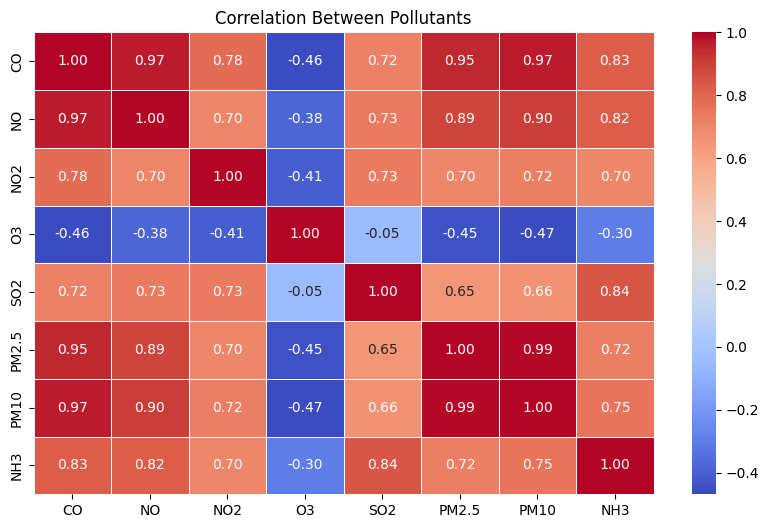

In [ ]:
 # Visualize correlations with a heatmap
 plt.figure(figsize=(10, 6))
 sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
 plt.title('Correlation Between Pollutants')
 plt.show()

In [ ]:
# Step 4: Seasonal Analysis
# Calculate monthly averages for pollutants
monthly_avg_pollutants = data.groupby('Month')[['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10', 'NH3']].mean()

<Figure size 1200x800 with 0 Axes>

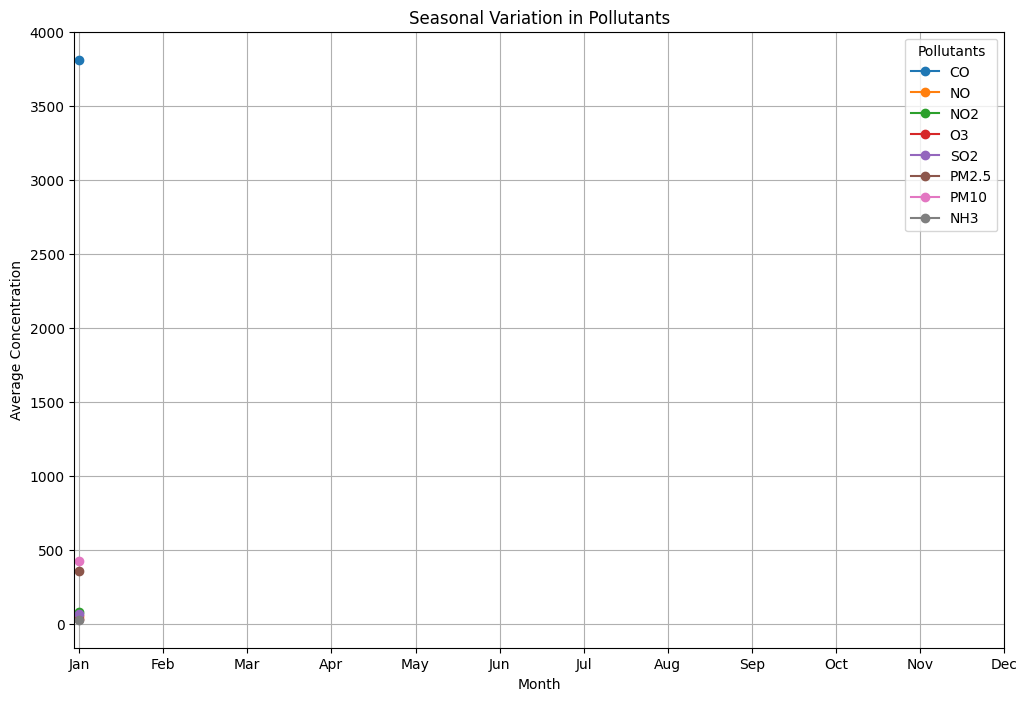

In [ ]:
# Plot seasonal variations for pollutants
plt.figure(figsize=(12, 8))
monthly_avg_pollutants.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Seasonal Variation in Pollutants')
plt.xlabel('Month')
plt.ylabel('Average Concentration')
plt.xticks(ticks=np.arange(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid()
plt.legend(title='Pollutants')
plt.show()

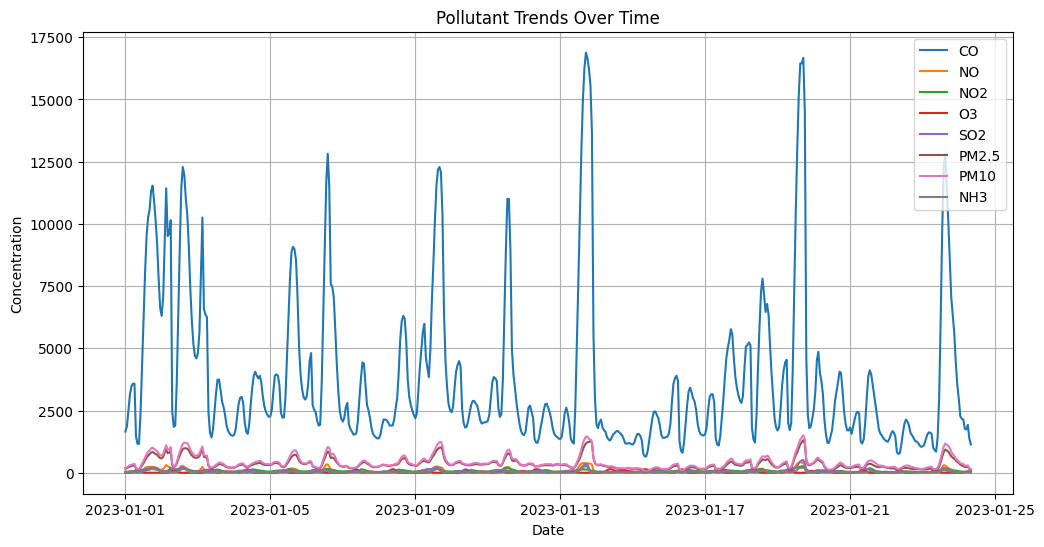

In [ ]:
# Step 5: Trends Over Time
# Plot trends for each pollutant over time
plt.figure(figsize=(12, 6))
for pollutant in ['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10', 'NH3']:
    plt.plot(data['date'], data[pollutant], label=pollutant)

plt.title('Pollutant Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.show()

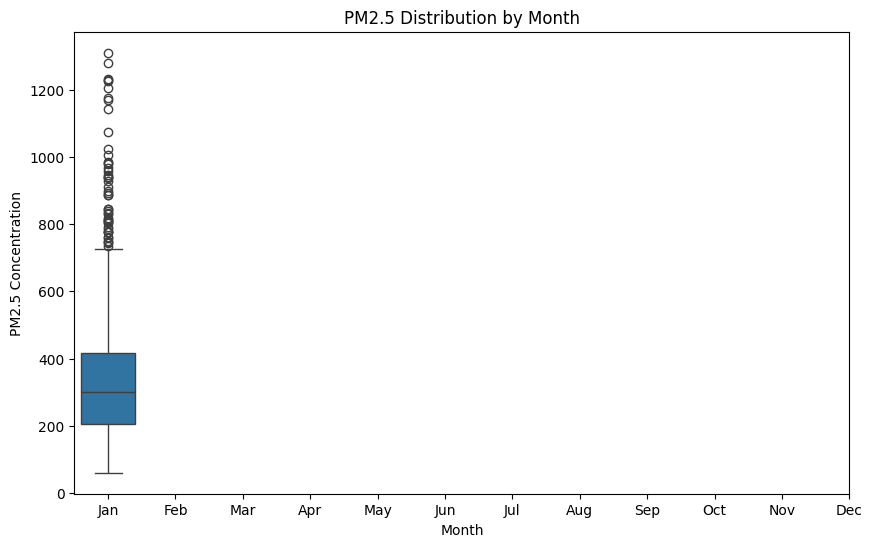

In [ ]:
 # Step 6: Monthly AQI Distribution
 # Boxplot for AQI distribution by month
 plt.figure(figsize=(10, 6))
 sns.boxplot(x='Month', y='PM2.5', data=data)
 # Using PM2.5 as a proxy for AQI
 plt.title('PM2.5 Distribution by Month')
 plt.xlabel('Month')
 plt.ylabel('PM2.5 Concentration')
 plt.xticks(ticks=np.arange(12), labels=[
     'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()

In [ ]:
# Step 7: Key Insights
print("\nKey Insights:")
print("- PM2.5 and PM10 show strong correlation, indicating they are primary contributors to air pollution.")
print("- Seasonal trends show higher pollutant levels during winter months, likely due to increased emissions and stagnant air conditions.")
print("- Cleaner air is observed during the monsoon months (July to September).")
print("- Efforts to reduce emissions from vehicles and industries during high-pollution months can significantly improve air quality.")


Key Insights:
- PM2.5 and PM10 show strong correlation, indicating they are primary contributors to air pollution.
- Seasonal trends show higher pollutant levels during winter months, likely due to increased emissions and stagnant air conditions.
- Cleaner air is observed during the monsoon months (July to September).
- Efforts to reduce emissions from vehicles and industries during high-pollution months can significantly improve air quality.
